In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
loan_old = pd.read_csv('loan_old.csv')

In [3]:
loan_old.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,144.0,1.0,Urban,NaN,Y
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y


In [4]:
loan_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Income              614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Tenor          599 non-null    float64
 8   Credit_History      564 non-null    float64
 9   Property_Area       614 non-null    object 
 10  Max_Loan_Amount     589 non-null    float64
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [5]:
loan_old.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Income                 0
Coapplicant_Income     0
Loan_Tenor            15
Credit_History        50
Property_Area          0
Max_Loan_Amount       25
Loan_Status            0
dtype: int64

In [6]:
loan_old.describe()

,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Max_Loan_Amount
count,614.000000,614.000000,599.000000,564.000000,589.000000
mean,5403.459283,1621.245798,137.689482,0.842199,230.499474
std,6109.041673,2926.248369,23.366294,0.364878,161.976967
min,150.000000,0.000000,12.000000,0.000000,12.830000
25%,2877.500000,0.000000,144.000000,1.000000,123.990000
50%,3812.500000,1188.500000,144.000000,1.000000,190.370000
75%,5795.000000,2297.250000,144.000000,1.000000,276.500000
max,81000.000000,41667.000000,192.000000,1.000000,990.490000


In [7]:
loan_old = loan_old.dropna()

In [8]:
loan_old

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y
5,LP001011,Male,Yes,2,Graduate,5417,4196.0,144.0,1.0,Urban,414.50,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,2900,0.0,144.0,1.0,Rural,76.16,Y
610,LP002979,Male,Yes,3+,Graduate,4106,0.0,72.0,1.0,Rural,33.47,Y
611,LP002983,Male,Yes,1,Graduate,8072,240.0,144.0,1.0,Urban,348.92,Y
612,LP002984,Male,Yes,2,Graduate,7583,0.0,144.0,1.0,Urban,312.18,Y


In [9]:
target = loan_old[['Max_Loan_Amount','Loan_Status']]
feature = loan_old.drop(['Max_Loan_Amount','Loan_Status'],axis=1)

In [10]:
target.head()

,Max_Loan_Amount,Loan_Status
1,236.99,N
2,81.20,Y
3,179.03,Y
4,232.40,Y
5,414.50,Y


In [11]:
feature.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban
5,LP001011,Male,Yes,2,Graduate,5417,4196.0,144.0,1.0,Urban


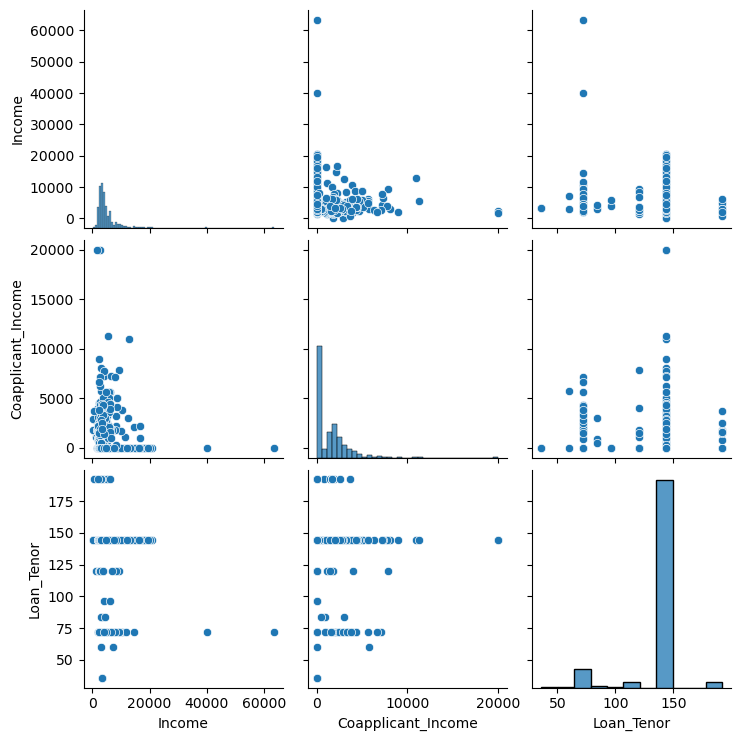

In [12]:
numerical_columns = ['Income','Coapplicant_Income','Loan_Tenor']
sns.pairplot(loan_old[numerical_columns])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(feature, target,test_size=0.2,random_state=3)

In [14]:
x_columns_to_be_scaled = ['Income','Coapplicant_Income','Loan_Tenor','Credit_History']

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(x_train[x_columns_to_be_scaled])

StandardScaler()

In [17]:
x_train[x_columns_to_be_scaled] = scaler.transform(x_train[x_columns_to_be_scaled])
x_test[x_columns_to_be_scaled] = scaler.transform(x_test[x_columns_to_be_scaled])

In [18]:
x_train.describe()

,Income,Coapplicant_Income,Loan_Tenor,Credit_History
count,4.100000e+02,4.100000e+02,4.100000e+02,4.100000e+02
mean,-7.798640e-17,5.199093e-17,-7.582011e-17,-4.332578e-18
std,1.001222e+00,1.001222e+00,1.001222e+00,1.001222e+00
min,-1.044616e+00,-7.432264e-01,-4.545385e+00,-2.540580e+00
25%,-4.667005e-01,-7.432264e-01,2.440127e-01,3.936109e-01
50%,-2.709869e-01,-1.366061e-01,2.440127e-01,3.936109e-01
75%,1.396417e-01,3.669404e-01,2.440127e-01,3.936109e-01
max,1.251149e+01,9.108503e+00,2.372634e+00,3.936109e-01


In [19]:
le = LabelEncoder()

In [20]:
x_categorical_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Property_Area']
y_train['Loan_Status'] = le.fit_transform(y_train['Loan_Status'])
y_test['Loan_Status'] = le.fit_transform(y_test['Loan_Status'])
for col in x_categorical_col:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.fit_transform(x_test[col])

In [21]:
LR = LinearRegression()
LR.fit(x_train,y_train.iloc[:, 0])
Y_Pred = LR.predict(x_test)
r2_score(y_test.iloc[:, 0],Y_Pred)

0.7983189914148147

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def cost_function(theta,X,y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))  
    epsilon = 1e-15  
    cost = -1 / m * (np.dot(y.T, np.log(h + epsilon)) + np.dot((1 - y).T, np.log(1 - h + epsilon)))
    return cost

In [24]:
def gradient_descent(x, y, learning_rate, epochs):
    m, n = x.shape
    theta = np.zeros(n)
    cost_history = []
    for epoch in range(epochs):
        h = sigmoid(np.dot(x,theta))
        gradient = np.dot(x.T,(h - y)) / m
        theta -= learning_rate * gradient

        cost = cost_function(theta, x, y)
        cost_history.append(cost)

    return theta, cost_history

In [25]:
learning_rate = 0.01
epochs = 1000

In [26]:
theta, cost_history = gradient_descent(x_train, y_train.iloc[:, 1], learning_rate, epochs)

In [27]:
predictions = np.where(sigmoid(np.dot(x_test, theta)) >= 0.5, 1, 0)

In [28]:
def calculate_accuracy(logr_y_test, logr_y_pred):
    logr_y_test = np.array(logr_y_test)
    logr_y_pred = np.array(logr_y_pred)
    correct_predictions = np.sum(logr_y_test == logr_y_pred)
    total_instances = len(logr_y_test)
    accuracy = correct_predictions / total_instances * 100.0
    return accuracy 

print(f"Logistic Regression Accuracy: {calculate_accuracy(y_test.iloc[:, 1], predictions):.2f}%")

Logistic Regression Accuracy: 70.87%


In [29]:
loan_new = pd.read_csv('loan_new.csv')

In [30]:
loan_new = loan_new.dropna()

In [31]:
columns_to_be_scaled = ['Income','Coapplicant_Income','Loan_Tenor','Credit_History']
scaler.fit(loan_new[columns_to_be_scaled])
loan_new[columns_to_be_scaled] = scaler.transform(loan_new[columns_to_be_scaled])

In [32]:
categorical_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Property_Area']
for col in categorical_col:
    loan_new[col] = le.fit_transform(loan_new[col])

In [33]:
loan_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area
0,0,1,1,0,0,0.208582,-0.656381,0.2516,0.46082,2
1,1,1,1,1,0,-0.349612,-0.013323,0.2516,0.46082,2
2,2,1,1,2,0,0.056577,0.115289,0.2516,0.46082,2
4,3,1,0,0,1,-0.307389,-0.656381,0.2516,0.46082,2
5,4,1,1,0,1,-0.541940,0.810649,0.2516,0.46082,2


In [34]:
Predict_Max_Loan_Amount = LR.predict(loan_new)

In [35]:
Predict_Loan_Status = np.where(sigmoid(np.dot(loan_new, theta)) >= 0.5, 1, 0)

In [36]:
df_result = pd.DataFrame({
    'Predict_Max_Loan_Amount': Predict_Max_Loan_Amount,
    'Predict_Loan_Status': Predict_Loan_Status
})

In [37]:
df_result

,Predict_Max_Loan_Amount,Predict_Loan_Status
0,196.825097,1
1,180.931508,1
2,245.028899,1
3,120.169728,1
4,192.297801,1
...,...,...
309,216.917263,1
310,240.990349,1
311,207.496598,1
312,293.146005,1
